# **LSTM MultiEntrada Clasificador - Empresa Southern Copper**
#### **Curso:** Inteligencia de Negocios
#### **Docente:**  Mg. Ernesto D. Cancho Rodríguez
#### **Equipo:** D
#### **Integrantes:**
*   Hurtado Santos, Estiven Salvador - 20200135
*   López Terrones, Ximena Xiomy - 20200020
*   Llactahuaman Muguerza, Anthony Joel - 20200091
*   Mondragón Zúñiga, Rubén Alberto - 20200082
*   Morales Robladillo, Nicole Maria - 20200136
*   Aquije Vásquez, Carlos Adrian - 19200319
*   Cespedes Flores, Sebastian - 1820025

### Importamos Librerías

In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
#Importamos la librería nueva
import yfinance as yf

In [4]:
fechaInicio = '2018-01-01'
fechaFin = '2022-12-31'

### Carga de datos SCCO

### Inputs para Predicción

#### Mercado de Commodities

##### Datos de GLD (ORO)

##### Datos de SLV (Plata)

##### Datos de COPX (Cobre)

#### Índicies

##### Datos de GSPC (Índice SP500)


##### Datos de IXIC (Índice NASDAQ)

##### Datos de DJI (Índice Dow Jones)

#### Mercado de divisas y Criptomonedas

##### Datos de PEN

##### Datos ETH

##### Datos BZ

##### Datos BTC

### Transformaciones

### Data del BCRP

#### Tasas de Interés

**Realizamos Transformaciones**

### Indicadores Bursátiles

**Realizamos Transformaciones**

#### Indicadores de Riesgo

#### Indice Precios Consumidor

#### Fred - Tasa Efectiva

### Combinamos la data

**Instalamos dependencias extras necesarias**

**Importamos librerías descargadas**

#### Limpieza de Datos

In [5]:
def obtenerData(instrumentoFinanciero, fechaInicio, fechaFin):
    IF_df = yf.download(instrumentoFinanciero,
                        start=fechaInicio, end=fechaFin)
    IF_df.columns += "_" + instrumentoFinanciero
    GLD_data = yf.download('GLD', start=fechaInicio, end=fechaFin)
    GLD_data.columns += "_GLD"
    SLV_data = yf.download('SLV', start=fechaInicio, end=fechaFin)
    SLV_data.columns += "_SLV"
    COPX_data = yf.download('COPX', start=fechaInicio, end=fechaFin)
    COPX_data.columns += "_COPX"
    GSPC_data = yf.download('^GSPC', start=fechaInicio, end=fechaFin)
    GSPC_data.columns += "_GSPC"
    IXIC_data = yf.download('^IXIC', start=fechaInicio, end=fechaFin)
    IXIC_data.columns += "_IXIC"
    DJI_data = yf.download('^DJI', start=fechaInicio, end=fechaFin)
    DJI_data.columns += "_DJI"
    PEN_X_data = yf.download('PEN=X', start=fechaInicio, end=fechaFin)
    PEN_X_data.columns += "_PEN_X"
    BZ_F_data = yf.download('BZ=F', start=fechaInicio, end=fechaFin)
    BZ_F_data.columns += "_BZ_F"
    df = pd.merge(IF_df, GLD_data, on='Date')
    df = pd.merge(df, SLV_data, on='Date')
    df = pd.merge(df, COPX_data, on='Date')
    df = pd.merge(df, GSPC_data, on='Date')
    df = pd.merge(df, IXIC_data, on='Date')
    df = pd.merge(df, DJI_data, on='Date')
    df = pd.merge(df, PEN_X_data, on='Date')
    df = pd.merge(df, BZ_F_data, on='Date')
    df = df.drop(['Volume_PEN_X'], axis=1)
    return df


In [6]:
fechaInicio = '2018-01-01'
fechaFin = '2022-12-31'
df = obtenerData('FSM', fechaInicio, fechaFin)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
df['FSM_Return'] = df['Close_FSM'].pct_change()
df['FSM_Return'] = df['FSM_Return'].shift(-1)
df['FSM_Return'] = df['FSM_Return'].fillna(0)
df

,Open_FSM,High_FSM,Low_FSM,Close_FSM,Adj Close_FSM,Volume_FSM,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Low_PEN_X,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,FSM_Return
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,5.31,5.34,5.20,5.33,5.33,940900,124.660004,125.180000,124.389999,125.150002,...,3.164500,3.1650,3.1650,66.419998,67.279999,66.230003,66.570000,66.570000,24294,-0.043152
2018-01-03,5.31,5.32,4.97,5.10,5.10,1865200,125.050003,125.089996,124.099998,124.820000,...,3.171200,3.1719,3.1719,66.489998,68.010002,66.400002,67.839996,67.839996,25878,0.007843
2018-01-04,5.11,5.15,5.00,5.14,5.14,985500,124.889999,125.849998,124.739998,125.459999,...,3.166700,3.1655,3.1655,68.000000,68.260002,67.529999,68.070000,68.070000,22840,-0.009728
2018-01-05,5.11,5.18,5.04,5.09,5.09,521200,124.930000,125.480003,124.830002,125.330002,...,3.148000,3.1503,3.1503,68.059998,68.089996,67.269997,67.620003,67.620003,18290,-0.003929
2018-01-08,5.14,5.20,5.02,5.07,5.07,616000,125.199997,125.320000,124.900002,125.309998,...,3.146200,3.2090,3.2090,67.820000,67.980003,67.449997,67.779999,67.779999,17704,-0.007890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,3.83,3.88,3.73,3.84,3.84,3607900,166.880005,167.800003,166.660004,167.259995,...,3.729958,3.8000,3.8000,81.730003,84.370003,81.339996,83.919998,83.919998,8621,0.031250
2022-12-27,3.86,4.07,3.84,3.96,3.96,3640000,167.889999,170.610001,167.800003,168.669998,...,3.717184,3.8175,3.8175,84.459999,85.669998,83.660004,84.330002,84.330002,7512,-0.040404
2022-12-28,3.91,3.92,3.77,3.80,3.80,2975000,168.050003,168.339996,167.100006,167.910004,...,3.740191,3.8080,3.8080,84.599998,84.639999,81.949997,83.260002,83.260002,5384,-0.007895


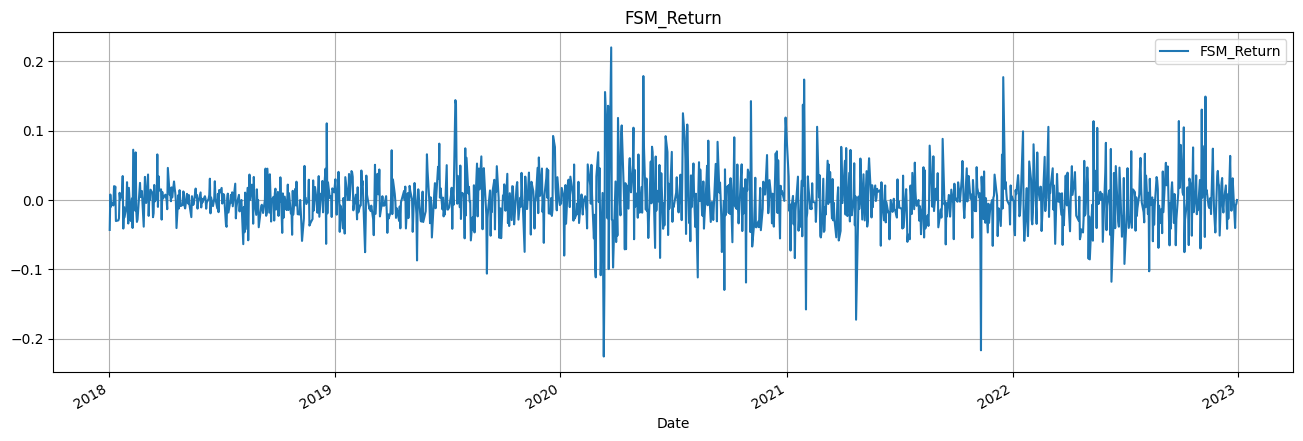

In [8]:
plt.figure(figsize=(16, 5))
plt.title("FSM_Return")
df.FSM_Return.plot()
plt.grid(True);
plt.legend()
plt.show()

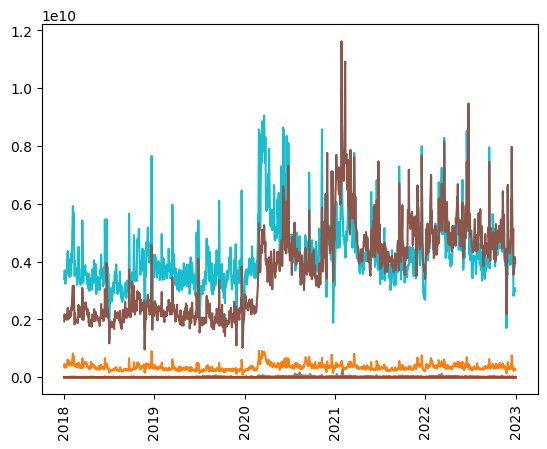

In [9]:
plt.plot(df);
plt.xticks(rotation='vertical');

### Procesamiento - Paso 1



In [10]:
df02 = df.copy()

In [11]:
df02.sample(10)

,Open_FSM,High_FSM,Low_FSM,Close_FSM,Adj Close_FSM,Volume_FSM,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Low_PEN_X,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,FSM_Return
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-05,3.77,3.87,3.77,3.82,3.82,1137700,146.380005,146.809998,146.160004,146.610001,...,3.290015,3.3620,3.3620,53.880001,56.470001,53.880001,55.279999,55.279999,56117,0.000000
2021-03-17,7.20,7.68,7.11,7.51,7.51,2698500,162.270004,164.149994,161.479996,163.509995,...,3.632230,3.6980,3.6980,68.389999,68.879997,66.959999,68.000000,68.000000,37607,-0.029294
2020-02-28,3.01,3.09,2.80,2.95,2.95,5166400,152.710007,152.770004,147.050003,148.380005,...,3.325431,3.4350,3.4350,51.369999,51.490002,50.119999,50.520000,50.520000,1149,0.033898
2020-04-15,2.57,2.70,2.45,2.48,2.48,3024700,161.800003,162.539993,160.809998,161.850006,...,3.302022,3.3930,3.3930,30.010000,30.420000,27.170000,27.690001,27.690001,32129,0.024194
2021-11-17,3.90,4.12,3.90,4.05,4.05,7047700,174.240005,174.610001,173.889999,174.500000,...,3.927731,3.9950,3.9950,82.330002,82.360001,79.769997,80.279999,80.279999,38038,-0.022222
2021-10-21,4.80,4.87,4.74,4.80,4.80,3304800,166.699997,166.940002,166.240005,166.750000,...,3.873068,3.9410,3.9410,85.879997,86.120003,83.360001,84.610001,84.610001,49004,0.022917
2020-11-09,7.41,7.64,7.30,7.51,7.51,4900500,176.419998,176.449997,173.639999,175.080002,...,3.524533,3.5900,3.5900,39.700001,43.490002,39.610001,42.400002,42.400002,55156,-0.035952
2018-02-15,4.84,4.86,4.68,4.75,4.75,777600,128.429993,128.570007,127.940002,128.380005,...,3.181700,3.2641,3.2641,64.320000,65.099998,63.119999,64.330002,64.330002,36176,-0.031579
2018-12-21,3.62,3.65,3.49,3.55,3.55,3116900,119.190002,119.250000,118.570000,118.720001,...,3.287000,3.3396,3.3396,54.820000,55.299999,52.810001,53.820000,53.820000,40930,0.025352


### Tratamiento de Missing Values

In [12]:
df03 = df02.dropna()  # Eliminar filas con valores nulos

In [13]:
df03

,Open_FSM,High_FSM,Low_FSM,Close_FSM,Adj Close_FSM,Volume_FSM,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Low_PEN_X,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,FSM_Return
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,5.31,5.34,5.20,5.33,5.33,940900,124.660004,125.180000,124.389999,125.150002,...,3.164500,3.1650,3.1650,66.419998,67.279999,66.230003,66.570000,66.570000,24294,-0.043152
2018-01-03,5.31,5.32,4.97,5.10,5.10,1865200,125.050003,125.089996,124.099998,124.820000,...,3.171200,3.1719,3.1719,66.489998,68.010002,66.400002,67.839996,67.839996,25878,0.007843
2018-01-04,5.11,5.15,5.00,5.14,5.14,985500,124.889999,125.849998,124.739998,125.459999,...,3.166700,3.1655,3.1655,68.000000,68.260002,67.529999,68.070000,68.070000,22840,-0.009728
2018-01-05,5.11,5.18,5.04,5.09,5.09,521200,124.930000,125.480003,124.830002,125.330002,...,3.148000,3.1503,3.1503,68.059998,68.089996,67.269997,67.620003,67.620003,18290,-0.003929
2018-01-08,5.14,5.20,5.02,5.07,5.07,616000,125.199997,125.320000,124.900002,125.309998,...,3.146200,3.2090,3.2090,67.820000,67.980003,67.449997,67.779999,67.779999,17704,-0.007890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,3.83,3.88,3.73,3.84,3.84,3607900,166.880005,167.800003,166.660004,167.259995,...,3.729958,3.8000,3.8000,81.730003,84.370003,81.339996,83.919998,83.919998,8621,0.031250
2022-12-27,3.86,4.07,3.84,3.96,3.96,3640000,167.889999,170.610001,167.800003,168.669998,...,3.717184,3.8175,3.8175,84.459999,85.669998,83.660004,84.330002,84.330002,7512,-0.040404
2022-12-28,3.91,3.92,3.77,3.80,3.80,2975000,168.050003,168.339996,167.100006,167.910004,...,3.740191,3.8080,3.8080,84.599998,84.639999,81.949997,83.260002,83.260002,5384,-0.007895


### Particionamiento en Entrenamiento y Test

In [14]:
# Dividir los datos en conjunto de entrenamiento y prueba
train_size = int(len(df03) * 0.8)
train_data = df03[:train_size]
test_data = df03[train_size-100:]

In [15]:
print(df03.shape)
print(train_size)
print(train_data.shape)
print(test_data.shape)

(1254, 54)
1003
(1003, 54)
(351, 54)


### Normalizamos la data en Escala de 0 y 1

In [16]:
df03.head()

,Open_FSM,High_FSM,Low_FSM,Close_FSM,Adj Close_FSM,Volume_FSM,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Low_PEN_X,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,FSM_Return
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,5.31,5.34,5.20,5.33,5.33,940900,124.660004,125.180000,124.389999,125.150002,...,3.1645,3.1650,3.1650,66.419998,67.279999,66.230003,66.570000,66.570000,24294,-0.043152
2018-01-03,5.31,5.32,4.97,5.10,5.10,1865200,125.050003,125.089996,124.099998,124.820000,...,3.1712,3.1719,3.1719,66.489998,68.010002,66.400002,67.839996,67.839996,25878,0.007843
2018-01-04,5.11,5.15,5.00,5.14,5.14,985500,124.889999,125.849998,124.739998,125.459999,...,3.1667,3.1655,3.1655,68.000000,68.260002,67.529999,68.070000,68.070000,22840,-0.009728
2018-01-05,5.11,5.18,5.04,5.09,5.09,521200,124.930000,125.480003,124.830002,125.330002,...,3.1480,3.1503,3.1503,68.059998,68.089996,67.269997,67.620003,67.620003,18290,-0.003929
2018-01-08,5.14,5.20,5.02,5.07,5.07,616000,125.199997,125.320000,124.900002,125.309998,...,3.1462,3.2090,3.2090,67.820000,67.980003,67.449997,67.779999,67.779999,17704,-0.007890


In [17]:
from sklearn.preprocessing import MinMaxScaler
# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))

In [18]:
scaled_train_data = scaler.fit_transform(train_data.drop(['FSM_Return'], axis=1))

In [19]:
scaled_train_data.shape

(1003, 53)

In [20]:
scaled_test_data = scaler.transform(test_data.drop(['FSM_Return'], axis=1))

In [21]:
print(type(scaled_train_data))
print(len(scaled_train_data))
print(scaled_train_data.shape)
scaled_train_data

<class 'numpy.ndarray'>
1003
(1003, 53)


array([[0.46675194, 0.41122715, 0.48758168, ..., 0.70433873, 0.70433873,
        0.27706508],
       [0.46675194, 0.40861619, 0.45751632, ..., 0.72327412, 0.72327412,
        0.29527324],
       [0.44117652, 0.38642297, 0.46143791, ..., 0.72670342, 0.72670342,
        0.26035129],
       ...,
       [0.28644504, 0.229765  , 0.30588235, ..., 0.89309679, 0.89309679,
        0.07892498],
       [0.27621484, 0.23107048, 0.30457516, ..., 0.89443862, 0.89443862,
        0.00327609],
       [0.29156013, 0.23107048, 0.31241829, ..., 0.89264941, 0.89264941,
        0.24770674]])

In [22]:
# Crear secuencias de tiempo para el modelo LSTM
window_size = 100

def create_sequences(data):
    x = []
    y = []
    for i in range( window_size , len(data) ):

        x.append( data[i-window_size:i] )
        y.append( data[i][-1] )


    return np.array(x), np.array(y)

In [23]:
x_train, y_train = create_sequences(scaled_train_data)

In [24]:
x_train.shape

(903, 100, 53)

In [25]:
y_train.shape

(903,)

In [26]:
x_test, y_test = create_sequences(scaled_test_data)

In [27]:
x_test.shape

(251, 100, 53)

In [28]:
y_test.shape

(251,)

In [29]:
x_train.shape[1]

100

In [30]:
x_train.shape[2]

53

### Modelo LSTM

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(units=160, return_sequences=True,
               input_shape=(x_train.shape[1], x_train.shape[2])))
# model.add(Dropout(0.2))
model.add(LSTM(units=160))
# model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 160)          136960    
                                                                 
 lstm_1 (LSTM)               (None, 160)               205440    
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 342561 (1.31 MB)
Trainable params: 342561 (1.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Compilar el modelo
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [33]:
# Entrenar el modelo
model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/100
15/15 [==============================] - 5s 226ms/step - loss: 0.6642 - accuracy: 0.0011 - val_loss: 0.5962 - val_accuracy: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 3s 190ms/step - loss: 0.6559 - accuracy: 0.0011 - val_loss: 0.5934 - val_accuracy: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 3s 184ms/step - loss: 0.6529 - accuracy: 0.0011 - val_loss: 0.6053 - val_accuracy: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 3s 188ms/step - loss: 0.6524 - accuracy: 0.0011 - val_loss: 0.6092 - val_accuracy: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 3s 195ms/step - loss: 0.6525 - accuracy: 0.0011 - val_loss: 0.6028 - val_accuracy: 0.0000e+00
Epoch 6/100
15/15 [==============================] - 3s 219ms/step - loss: 0.6511 - accuracy: 0.0011 - val_loss: 0.6179 - val_accuracy: 0.0000e+00
Epoch 7/100
15/15 [==============================] - 3s 189ms/step - loss: 0.6511 - accuracy: 0.0011 - val_loss: 0.620

15/15 [==============================] - 3s 203ms/step - loss: 0.6275 - accuracy: 0.0022 - val_loss: 0.6150 - val_accuracy: 0.0000e+00
Epoch 57/100
15/15 [==============================] - 3s 205ms/step - loss: 0.6278 - accuracy: 0.0022 - val_loss: 0.6410 - val_accuracy: 0.0000e+00
Epoch 58/100
15/15 [==============================] - 3s 192ms/step - loss: 0.6266 - accuracy: 0.0022 - val_loss: 0.6219 - val_accuracy: 0.0000e+00
Epoch 59/100
15/15 [==============================] - 3s 192ms/step - loss: 0.6269 - accuracy: 0.0022 - val_loss: 0.6003 - val_accuracy: 0.0000e+00
Epoch 60/100
15/15 [==============================] - 3s 194ms/step - loss: 0.6252 - accuracy: 0.0022 - val_loss: 0.6203 - val_accuracy: 0.0000e+00
Epoch 61/100
15/15 [==============================] - 3s 195ms/step - loss: 0.6265 - accuracy: 0.0011 - val_loss: 0.6366 - val_accuracy: 0.0000e+00
Epoch 62/100
15/15 [==============================] - 3s 195ms/step - loss: 0.6269 - accuracy: 0.0022 - val_loss: 0.6201 - va

In [34]:
# Evaluar el modelo en el conjunto de ENTRENAMIENTO
loss_train, accuracy_train = model.evaluate(x_train, y_train)
print('Loss:', loss_train)
print('Accuracy:', accuracy_train)

29/29 [==============================] - 1s 25ms/step - loss: 0.6193 - accuracy: 0.0022
Loss: 0.61933833360672
Accuracy: 0.0022148394491523504


In [35]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

8/8 [==============================] - 0s 26ms/step - loss: 0.6176 - accuracy: 0.0000e+00
Loss: 0.6176371574401855
Accuracy: 0.0


In [36]:
# Predecir la tendencia para el periodo de TRAINING, evaluar el aprendizaje
train_predict = model.predict(x_train)
train_predict

29/29 [==============================] - 1s 23ms/step


array([[0.24939668],
       [0.12846695],
       [0.09298423],
       [0.39454523],
       [0.39469674],
       [0.4104391 ],
       [0.4171351 ],
       [0.40208003],
       [0.42664918],
       [0.35862282],
       [0.3325129 ],
       [0.33897012],
       [0.35629198],
       [0.3667533 ],
       [0.39852205],
       [0.39062402],
       [0.39719296],
       [0.40480766],
       [0.45335573],
       [0.48309436],
       [0.37789664],
       [0.27158165],
       [0.10373143],
       [0.05425499],
       [0.507848  ],
       [0.33853734],
       [0.3513492 ],
       [0.31010854],
       [0.29231834],
       [0.3113268 ],
       [0.35313776],
       [0.45155972],
       [0.441664  ],
       [0.38036504],
       [0.3545548 ],
       [0.3396005 ],
       [0.3040785 ],
       [0.32046604],
       [0.3130338 ],
       [0.31411594],
       [0.2312718 ],
       [0.17066655],
       [0.14878725],
       [0.11014678],
       [0.13344303],
       [0.21308735],
       [0.28228906],
       [0.280

In [37]:
# Predecir la tendencia para el periodo de TEST, incluido el día siguiente
test_predict = model.predict(x_test)


8/8 [==============================] - 0s 24ms/step


In [38]:
test_predict.shape

(251, 1)

In [39]:
train  = df03[:train_size]
valid  = df03[train_size:]
valid['Predictions'] = test_predict

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2452\1475914596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = test_predict


In [40]:
valid

,Open_FSM,High_FSM,Low_FSM,Close_FSM,Adj Close_FSM,Volume_FSM,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,FSM_Return,Predictions
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,3.87,3.96,3.81,3.92,3.92,1670800,168.860001,169.009995,168.000000,168.330002,...,3.9870,3.9870,77.940002,79.279999,77.040001,78.980003,78.980003,27224,-0.002551,0.230751
2022-01-04,3.91,3.98,3.85,3.91,3.91,3862600,168.899994,169.720001,168.729996,169.570007,...,3.9625,3.9625,78.949997,80.550003,78.599998,80.000000,80.000000,31321,-0.043478,0.265375
2022-01-05,3.98,4.01,3.72,3.74,3.74,4964300,170.619995,170.929993,168.899994,169.059998,...,3.9550,3.9550,80.080002,81.489998,79.550003,80.800003,80.800003,35152,-0.050802,0.310454
2022-01-06,3.63,3.69,3.55,3.55,3.55,3745500,167.160004,167.750000,166.860001,166.990005,...,3.9590,3.9590,80.150002,82.839996,79.629997,81.989998,81.989998,41582,0.014084,0.371958
2022-01-07,3.58,3.63,3.53,3.60,3.60,3091700,167.369995,168.009995,166.860001,167.750000,...,3.9650,3.9650,82.059998,82.989998,81.440002,81.750000,81.750000,29501,0.008333,0.423181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,3.83,3.88,3.73,3.84,3.84,3607900,166.880005,167.800003,166.660004,167.259995,...,3.8000,3.8000,81.730003,84.370003,81.339996,83.919998,83.919998,8621,0.031250,0.219203
2022-12-27,3.86,4.07,3.84,3.96,3.96,3640000,167.889999,170.610001,167.800003,168.669998,...,3.8175,3.8175,84.459999,85.669998,83.660004,84.330002,84.330002,7512,-0.040404,0.282422
2022-12-28,3.91,3.92,3.77,3.80,3.80,2975000,168.050003,168.339996,167.100006,167.910004,...,3.8080,3.8080,84.599998,84.639999,81.949997,83.260002,83.260002,5384,-0.007895,0.398412


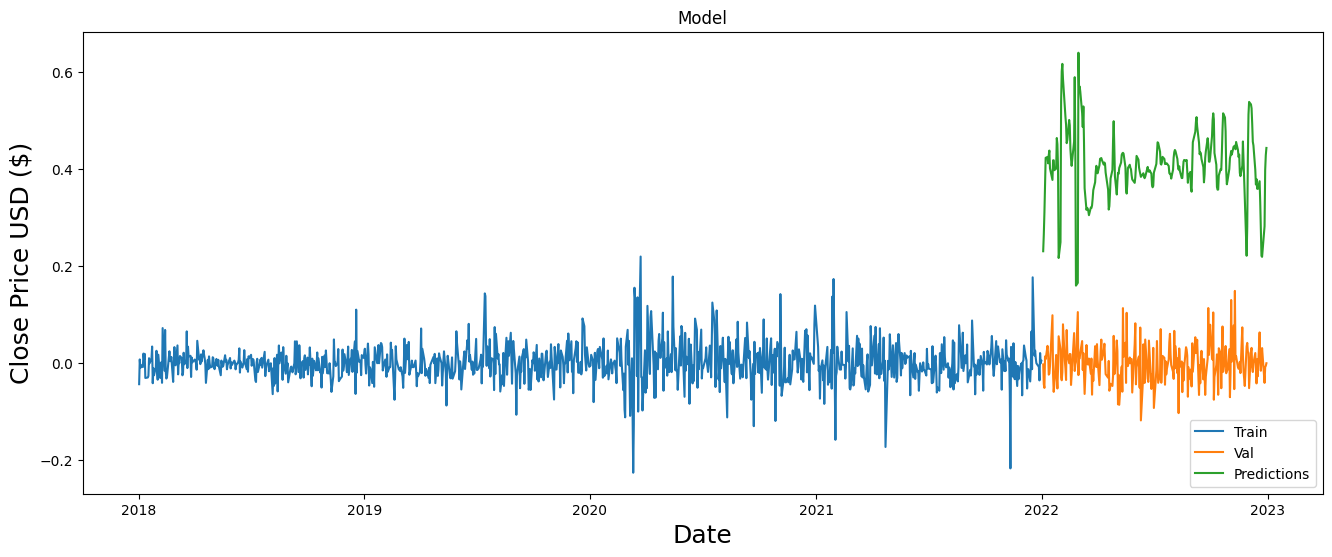

In [41]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['FSM_Return'])
plt.plot(valid[['FSM_Return', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [43]:
model.save("FSM_LSTM.h5")

C:\Users\Usuario\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
